In [1]:
! pip install pandas_datareader
! pip install yfinance
! pip install yfinance ta

import ta
from datetime import datetime, timedelta
# 導入 yfinance 並重新定義變數
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt
import os



     -------------------------------------- 109.5/109.5 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 4.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 94.6/94.6 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 3.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 112.2/112.2 kB 2.2 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138939 sha256=f73463a85c2f8297517c79b0a84d06f8b6908651edf0589f391c6f1b4286b9d0
  Stored in directory: c:\users\huang\appdata\local\pip\cache\wheels\72\e4\de\7787042336d6d423f355f0299296f92be2b7b5598667e9cf5c
Successfully built peewee



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
  DEPRECATION: ta is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for ta: started
  Running setup.py install for ta: finished with status 'done'


In [2]:
import seaborn as sns

In [4]:
# 設置歷史數據的時間範圍
start = dt.datetime(2020, 3, 24)  # 疫情開始
end = dt.datetime(2024, 9, 30)    # 結束時間為今年六月
number_of_portfolios = 10000      # 投資組合數量
Rf = 0.04446                      # 無風險利率 (2024-06-11)

# 定義初始總投資金額
total_initial_investment = 50000000  # 總初始投資金額為50,000,000

# 股票比例
stocks_percent = 0.60  # 60% 投資在股票

In [5]:
# 定義各個國家的主要指數代碼
indices = {
    'Taiwan Weighted': '^TWII',
    'Hong Kong Hang Seng': '^HSI',
    'S&P 500': '^GSPC',  # 美國標普500指數
    'Nikkei 225': '^N225',  # 日本日經225指數
    'FTSE 100': '^FTSE',  # 英國富時100指數
    'DAX': '^GDAXI',  # 德國DAX指數
    'CAC 40': '^FCHI'  # 法國CAC 40指數
}

# 下載數據
data = yf.download(list(indices.values()), start=start, end=end)['Adj Close']

# 重新命名數據框的列
data.columns = indices.keys()

# 顯示前幾行數據
print(data.head())

[*********************100%***********************]  7 of 7 completed

                           Taiwan Weighted  Hong Kong Hang Seng       S&P 500  \
Date                                                                            
2020-03-24 00:00:00+00:00      4242.700195          5446.000000   9700.570312   
2020-03-25 00:00:00+00:00      4432.299805          5688.200195   9874.259766   
2020-03-26 00:00:00+00:00      4543.580078          5815.700195  10000.959961   
2020-03-27 00:00:00+00:00      4351.490234          5510.299805   9632.519531   
2020-03-30 00:00:00+00:00      4378.509766          5563.700195   9815.969727   

                            Nikkei 225      FTSE 100           DAX  \
Date                                                                 
2020-03-24 00:00:00+00:00  2447.330078  22663.490234  18092.349609   
2020-03-25 00:00:00+00:00  2475.560059  23527.189453  19546.630859   
2020-03-26 00:00:00+00:00  2630.070068  23352.339844  18664.599609   
2020-03-27 00:00:00+00:00  2541.469971  23484.279297  19389.429688   
2020-03-30 0

C:\Users\huang\AppData\Local\Temp\ipykernel_45356\2596070067.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


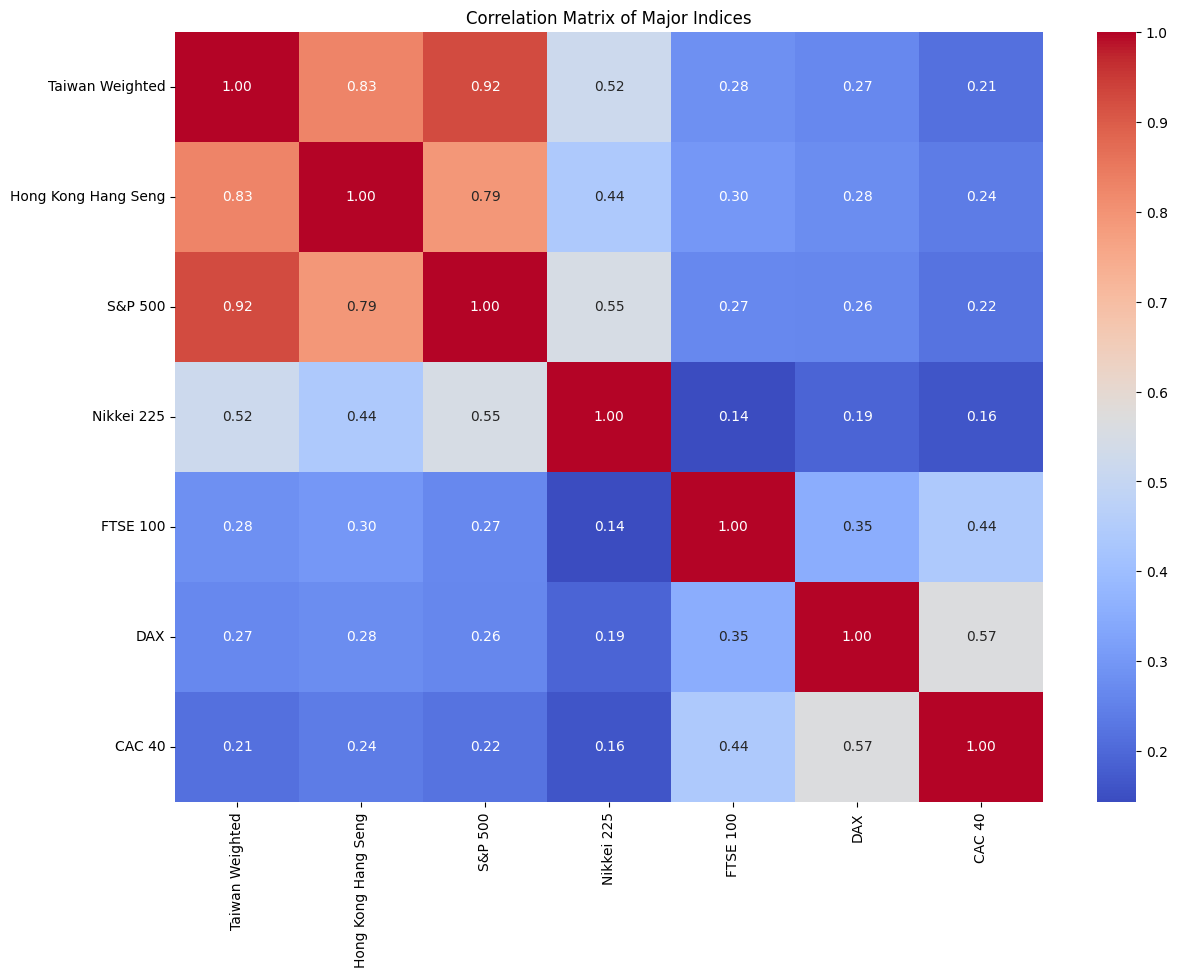

In [7]:
# 計算每日回報率
returns = data.pct_change().dropna()

# 計算相關矩陣
correlation_matrix = returns.corr()

# 繪製相關矩陣熱圖
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Major Indices')
plt.show()


In [37]:
#生物與醫療
stocks_bio = [
    '1565.TWO',  # 精華
    '4105.TWO',  # 東洋
    '4175.TWO',  # 杏一
    '6469.TWO',  # 大樹
    '6747.TWO',  #亨泰光
]


In [38]:
#半導體
stocks_semi = [
    '3105.TWO',  # 穩戀
    '3264.TWO',  # 欣詮
    '3680.TWO',  # 家登
    '5274.TWO',  # 信驊
    #'6488.TWO',  # 環球晶
    #'6568.TWO',  # 宏觀
    '8086.TWO',  # 宏捷科
    '3324.TWO',  # 雙鴻
    '6187.TWO',  #萬潤
]


In [39]:
#電池
stocks_battery = [
    '8255.TWO',  # 朋程
]


In [40]:
#綠能
stocks_energy = [
    '3713.TWO',   # 新晶投控
    '5432.TWO',   #新門
    '6692.TWO'    #進能服
]

In [41]:
#債券
bonds=[
    '00679B.TWO', #元大美債20年
    '00687B.TWO', #國泰20年美債
    '00758B.TWO', #復華能源債
    '00799B.TWO' #國泰A級醫療債
]

In [43]:
#ETF
etfs=[
    '00877.TWO',
    '00888.TWO',
    '006201.TWO'

]

In [44]:
stocks=stocks_energy+stocks_semi+stocks_battery+stocks_bio
tickers=stocks+etfs+bonds

tickers

['3713.TWO',
 '5432.TWO',
 '6692.TWO',
 '3105.TWO',
 '3264.TWO',
 '3680.TWO',
 '5274.TWO',
 '8086.TWO',
 '3324.TWO',
 '6187.TWO',
 '8255.TWO',
 '1565.TWO',
 '4105.TWO',
 '4175.TWO',
 '6469.TWO',
 '6747.TWO',
 '00877.TWO',
 '00888.TWO',
 '006201.TWO',
 '00679B.TWO',
 '00687B.TWO',
 '00758B.TWO',
 '00799B.TWO']

In [45]:
print(len(tickers))
print(len(stocks))

23
16


In [46]:
# 设置环境变量以隐藏进度条
os.environ['YFINANCE_NO_PROGRESS_BAR'] = 'true'
# 获取每只股票的第一个记录时间
for ticker in tickers:
    data = yf.download(ticker, period="max")  # 下载最大可用时间段的数据
    if not data.empty:
        first_date = data.index.min()  # 获取第一个记录时间
        print(f"{ticker}: {first_date}")
    else:
        print(f"{ticker}: No data available")



[*********************100%***********************]  1 of 1 completed


3713.TWO: 2020-03-03 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


5432.TWO: 2007-12-31 00:00:00
6692.TWO: 2018-09-21 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

3105.TWO: 2011-12-13 00:00:00


3264.TWO: 2007-12-31 00:00:00


[*********************100%***********************]  1 of 1 completed


3680.TWO: 2011-08-31 00:00:00


[*********************100%***********************]  1 of 1 completed


5274.TWO: 2012-06-20 00:00:00


[*********************100%***********************]  1 of 1 completed


8086.TWO: 2007-12-31 00:00:00


[*********************100%***********************]  1 of 1 completed


3324.TWO: 2007-12-31 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

6187.TWO: 2007-12-31 00:00:00


8255.TWO: 2007-12-31 00:00:00


[*********************100%***********************]  1 of 1 completed


1565.TWO: 2007-12-31 00:00:00


[*********************100%***********************]  1 of 1 completed


4105.TWO: 2007-12-31 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


4175.TWO: 2012-12-21 00:00:00
6469.TWO: 2014-12-29 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


6747.TWO: 2019-10-07 00:00:00
00877.TWO: 2020-07-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


00888.TWO: 2021-03-23 00:00:00
006201.TWO: 2011-01-12 00:00:00


[*********************100%***********************]  1 of 1 completed


00679B.TWO: 2017-01-11 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


00687B.TWO: 2017-04-06 00:00:00
00758B.TWO: 2018-11-02 00:00:00


[*********************100%***********************]  1 of 1 completed

00799B.TWO: 2019-04-23 00:00:00


In [47]:
# 初始化報酬率 DataFrame
returns = pd.DataFrame()

# 抓取歷史數據並計算報酬率
for ticker in tickers:
    data = yf.download(ticker, start=start, end=end)
    if not data.empty:
        data[ticker] = data['Adj Close'].pct_change()
        if returns.empty:
            returns = data[[ticker]]
        else:
            returns = returns.join(data[[ticker]], how='outer')

# 移除 NaN 值
returns = returns.dropna()

# 顯示計算後的報酬率
print(returns.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

            3713.TWO  5432.TWO  6692.TWO  3105.TWO  3264.TWO  3680.TWO  \
Date                                                                     
2021-03-24 -0.011385  0.002638  0.000000 -0.002597 -0.013274  0.020635   
2021-03-25 -0.015355 -0.010526  0.005941  0.005208  0.013453 -0.012442   
2021-03-26 -0.011696 -0.007979  0.023622  0.028497  0.015487  0.066142   
2021-03-29  0.011834 -0.013405 -0.009615 -0.016373 -0.001089 -0.010340   
2021-03-30 -0.003899  0.021739 -0.005825  0.011524 -0.010905 -0.010448   

            5274.TWO  8086.TWO  3324.TWO  6187.TWO  ...  4175.TWO  6469.TWO  \
Date                                                ...                       
2021-03-24  0.002985  0.000000  0.002347  0.019231  ...  0.002825  0.012146   
2021-03-25 -0.005952 -0.010526 -0.004684  0.061321  ... -0.002817 -0.012000   
2021-03-26  0.005988  0.031915  0.004706  0.004444  ...  0.004237  0.016194   
2021-03-29  0.000000  0.013746  0.004684 -0.017699  ...  0.004219 -0.003984   
2021-03

In [48]:
# 股票比例
stocks_percent = 0.60  # 60% 投資在股票

# 投資組合結果
portfolio_weights = []
portfolio_returns = []
portfolio_risks = []
sharpe_ratios = []
np.random.seed(1)  # 固定隨機亂數

# 確認股票變數數量
num_stocks = len(stocks)

for portfolio in range(number_of_portfolios):
    # 隨機生成股票的權重
    weights_stocks = np.random.random_sample(num_stocks)
    # 計算總和並調整比例
    weights_stocks = np.round((weights_stocks / np.sum(weights_stocks)) * stocks_percent, 4)

    # 合併所有權重
    weights = weights_stocks
    portfolio_weights.append(weights)

    # 計算年化回報率
    annualized_return = np.sum(returns[stocks].mean() * weights) * 252
    portfolio_returns.append(annualized_return)

    # 計算投資組合風險
    matrix_covariance = returns[stocks].cov() * 252
    portfolio_covariance = np.dot(np.dot(weights.T, matrix_covariance), weights)
    portfolio_std = np.sqrt(portfolio_covariance)
    portfolio_risks.append(portfolio_std)

    # Sharpe Ratio
    sharpe_ratio = (annualized_return - Rf) / portfolio_std
    sharpe_ratios.append(sharpe_ratio)


In [49]:
# Portfolio DataFrame
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)
sharpe_ratios = np.array(sharpe_ratios)
portfolio_weights = np.array(portfolio_weights)

portfolio_metrics = [portfolio_returns, portfolio_risks, sharpe_ratios, portfolio_weights]
portfolio_df = pd.DataFrame(portfolio_metrics).T
portfolio_df.columns = ['Return', 'Risk', 'Sharpe Ratio', 'Weights']



In [50]:
# 顯示結果
portfolio_df

,Return,Risk,Sharpe Ratio,Weights
0,0.156244,0.132828,0.841564,"[0.0415, 0.0717, 0.0, 0.0301, 0.0146, 0.0092, ..."
1,0.188888,0.152295,0.948341,"[0.0332, 0.0444, 0.0112, 0.0157, 0.0636, 0.076..."
2,0.154131,0.139002,0.78899,"[0.0615, 0.0342, 0.0444, 0.0203, 0.0441, 0.053..."
3,0.128973,0.137813,0.613243,"[0.0299, 0.0135, 0.002, 0.0706, 0.022, 0.0276,..."
4,0.17809,0.132341,1.009738,"[0.0035, 0.0374, 0.0463, 0.0359, 0.0659, 0.040..."
...,...,...,...,...
9995,0.161636,0.131548,0.89075,"[0.0007, 0.0514, 0.0386, 0.0641, 0.0504, 0.052..."
9996,0.174042,0.13832,0.936825,"[0.0299, 0.0589, 0.0536, 0.0422, 0.0053, 0.010..."
9997,0.166707,0.134588,0.908301,"[0.0179, 0.0416, 0.0242, 0.0105, 0.0432, 0.052..."
9998,0.127482,0.124888,0.664772,"[0.0639, 0.0325, 0.0609, 0.0228, 0.0626, 0.045..."


# **以下內容開始將資料視覺化**

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd




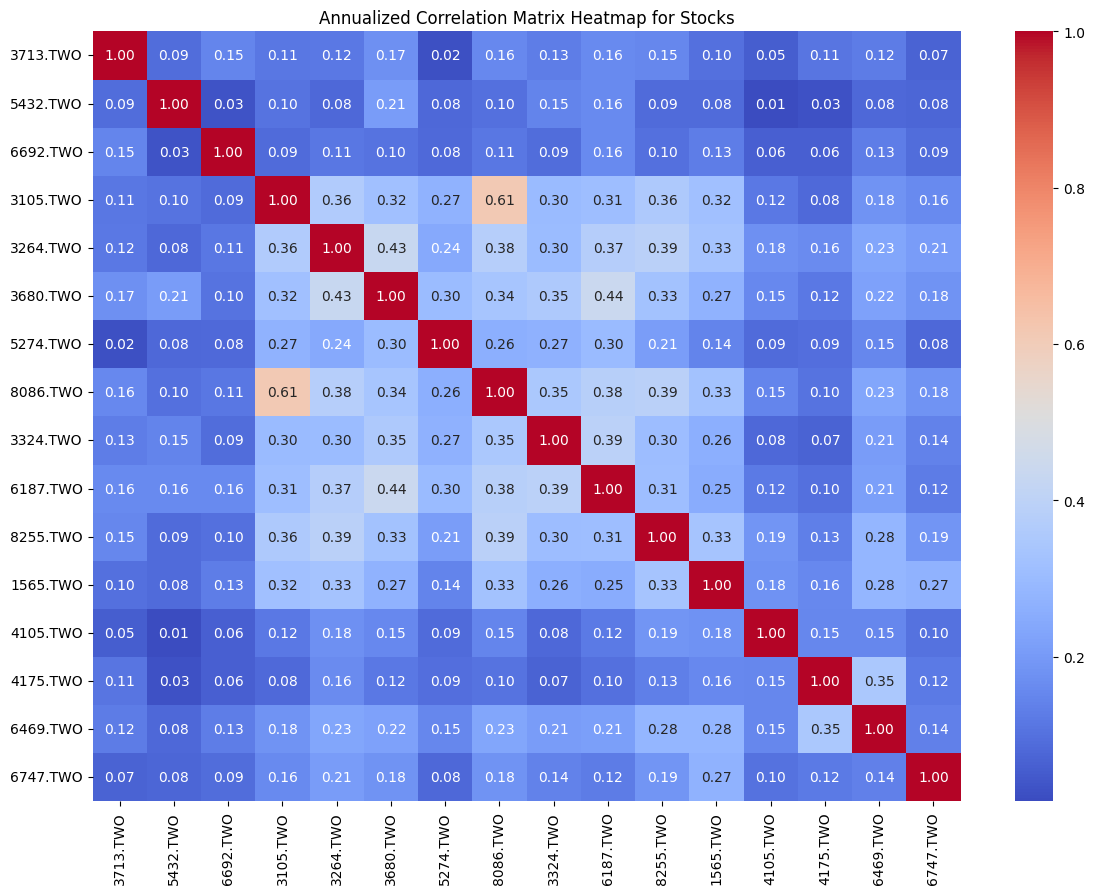

In [52]:
# 提取股票部分的回報率數據
stocks_returns = returns[[col for col in returns.columns if col in stocks]]

# 計算股票部分的相關矩陣
correlation_matrix_stocks = stocks_returns.corr()

# 繪製相關矩陣熱圖
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_stocks, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Annualized Correlation Matrix Heatmap for Stocks')
plt.show()


In [53]:


# 提取股票部分的回報率、風險和夏普比率數據
stocks_portfolio_df = portfolio_df.iloc[:num_stocks]

# 找到股票部分的最大回報率和最大夏普比率對應的投資組合
max_return_stock = stocks_portfolio_df.iloc[stocks_portfolio_df['Return'].astype(float).idxmax()]
max_sharpe_stock = stocks_portfolio_df.iloc[stocks_portfolio_df['Sharpe Ratio'].astype(float).idxmax()]

# 輸出最大回報率和最大夏普比率對應的股票部分的投資組合數據
print('Max Return for Stocks=')
print(max_return_stock, '\n')
print('Max Sharpe Ratio for Stocks=')
print(max_sharpe_stock, '\n')


Max Return for Stocks=
Return                                                   0.188888
Risk                                                     0.152295
Sharpe Ratio                                             0.948341
Weights         [0.0332, 0.0444, 0.0112, 0.0157, 0.0636, 0.076...
Name: 1, dtype: object 

Max Sharpe Ratio for Stocks=
Return                                                    0.17809
Risk                                                     0.132341
Sharpe Ratio                                             1.009738
Weights         [0.0035, 0.0374, 0.0463, 0.0359, 0.0659, 0.040...
Name: 4, dtype: object 



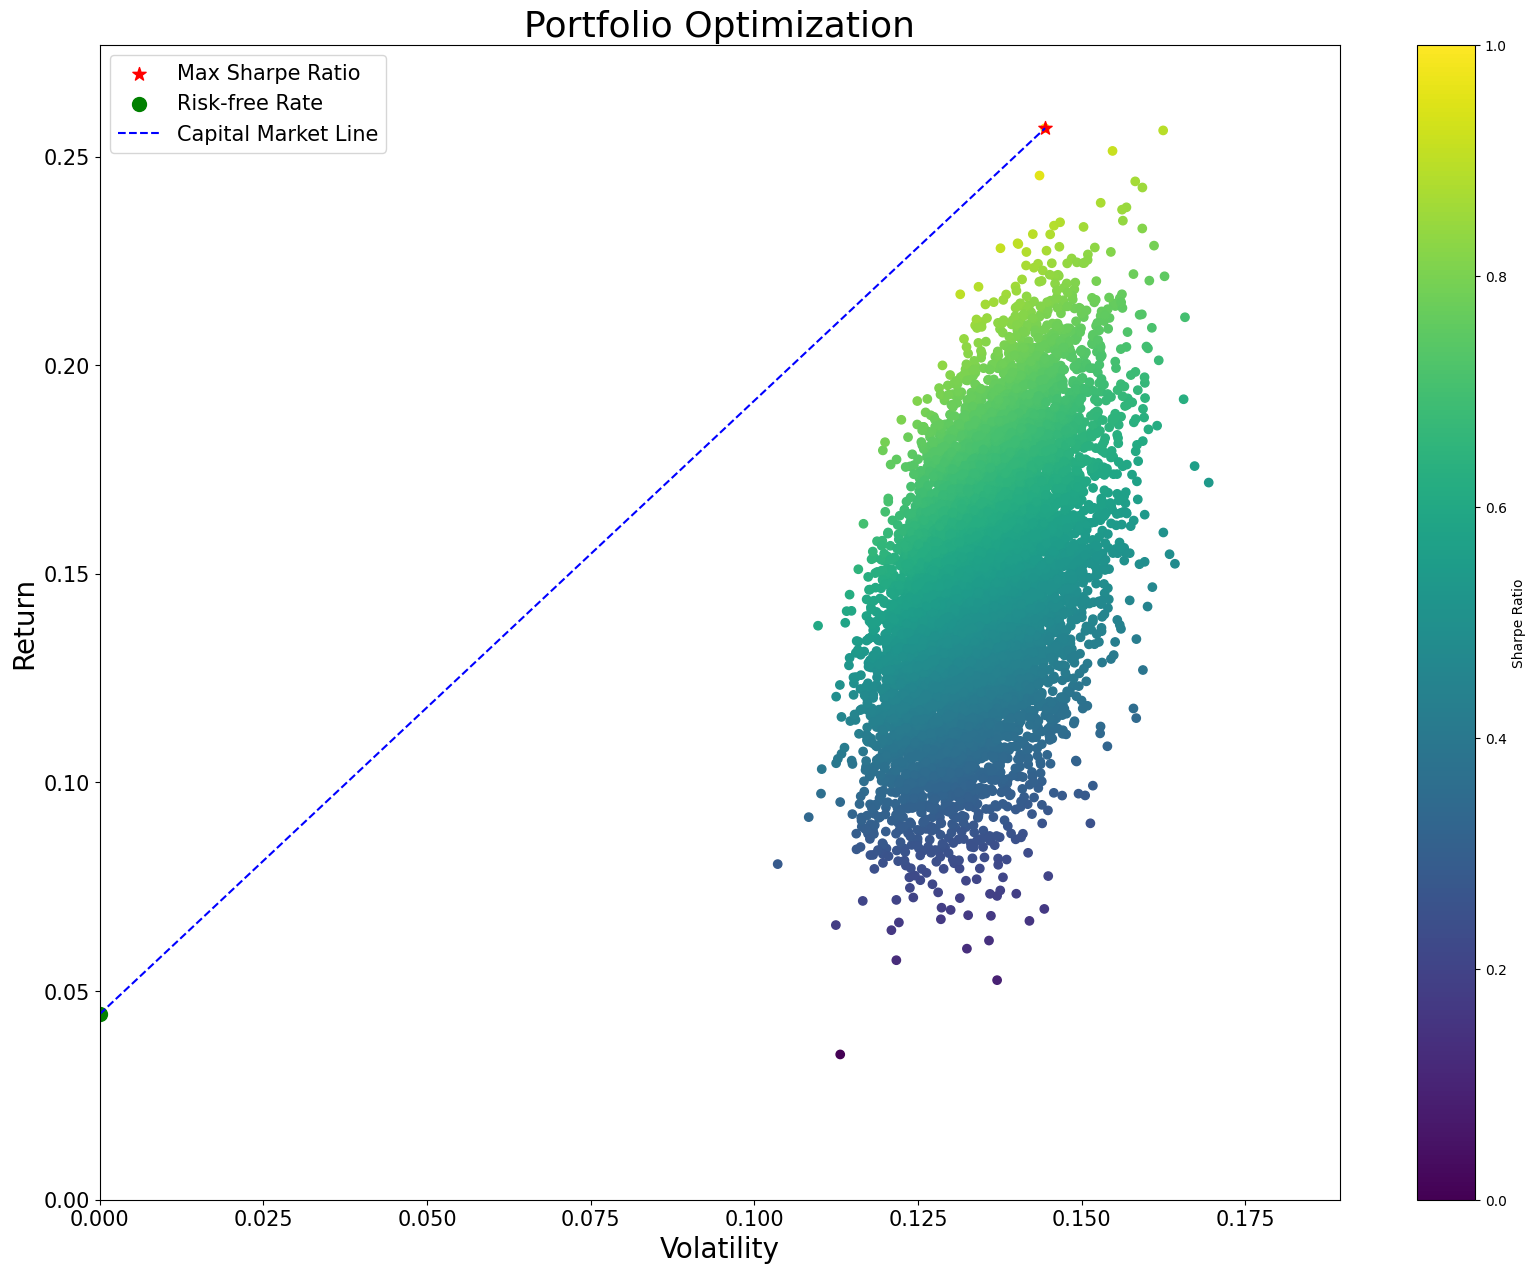

In [54]:
# 找到最大Sharpe比率對應的投資組合
max_sharpe = portfolio_df.iloc[portfolio_df['Sharpe Ratio'].astype(float).idxmax()]

# 可視化
plt.figure(figsize=(20, 15))
plt.scatter(portfolio_risks, portfolio_returns, c=sharpe_ratios, cmap='viridis')
plt.scatter(x=max_sharpe['Risk'], y=max_sharpe['Return'], marker='*', c='r', s=100, label='Max Sharpe Ratio')
plt.scatter(x=0, y=Rf, c='g', s=100, label='Risk-free Rate')
plt.plot([0, max_sharpe["Risk"]], [Rf, max_sharpe['Return']], color='b', linestyle='--', label='Capital Market Line')
plt.title("Portfolio Optimization", fontsize=26)
plt.xlabel('Volatility', fontsize=20)
plt.ylabel('Return', fontsize=20)
plt.xlim(0, max(portfolio_risks) + 0.02)
plt.ylim(0, max(portfolio_returns) + 0.02)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.colorbar(label='Sharpe Ratio')
plt.legend(fontsize=15)
plt.show()


In [55]:
# 假設最大Sharpe比率投資組合權重
our_portfolio = max_sharpe  # 使用max_sharpe變量來確定最大Sharpe比率投資組合
stock_weights = our_portfolio['Weights'][:num_stocks]

# 計算投資金額
stock_investment = stock_weights * total_initial_investment

# 建立 DataFrame 來顯示股票的權重和投資金額
def create_stock_df(tickers, weights, investment):
    return pd.DataFrame({'Ticker': tickers, 'Weight': weights, 'Investment': investment})

stocks_bio_weights = stock_weights[:len(stocks_bio)]
stocks_semi_weights = stock_weights[len(stocks_bio):len(stocks_bio) + len(stocks_semi)]
stocks_battery_weights = stock_weights[len(stocks_bio) + len(stocks_semi):len(stocks_bio) + len(stocks_semi) + len(stocks_battery)]
stocks_energy_weights = stock_weights[len(stocks_bio) + len(stocks_semi) + len(stocks_battery):]

stocks_bio_investment = stock_investment[:len(stocks_bio)]
stocks_semi_investment = stock_investment[len(stocks_bio):len(stocks_bio) + len(stocks_semi)]
stocks_battery_investment = stock_investment[len(stocks_bio) + len(stocks_semi):len(stocks_bio) + len(stocks_semi) + len(stocks_battery)]
stocks_energy_investment = stock_investment[len(stocks_bio) + len(stocks_semi) + len(stocks_battery):]

stocks_bio_df = create_stock_df(stocks_bio, stocks_bio_weights, stocks_bio_investment)
stocks_semi_df = create_stock_df(stocks_semi, stocks_semi_weights, stocks_semi_investment)
stocks_battery_df = create_stock_df(stocks_battery, stocks_battery_weights, stocks_battery_investment)
stocks_energy_df = create_stock_df(stocks_energy, stocks_energy_weights, stocks_energy_investment)

# 輸出表格
print("Max Sharpe Ratio Portfolio Weights for Stocks")

print("\nBiotechnology and Medical:")
print(stocks_bio_df)

print("\nSemiconductor:")
print(stocks_semi_df)

print("\nBattery:")
print(stocks_battery_df)

print("\nGreen Energy:")
print(stocks_energy_df)


Max Sharpe Ratio Portfolio Weights for Stocks

Biotechnology and Medical:
     Ticker  Weight  Investment
0  1565.TWO  0.0006     30000.0
1  4105.TWO  0.0896   4480000.0
2  4175.TWO  0.0346   1730000.0
3  6469.TWO  0.0043    215000.0
4  6747.TWO  0.0098    490000.0

Semiconductor:
     Ticker  Weight  Investment
0  3105.TWO  0.0616   3080000.0
1  3264.TWO  0.0823   4115000.0
2  3680.TWO  0.0108    540000.0
3  5274.TWO  0.0173    865000.0
4  8086.TWO  0.0555   2775000.0
5  3324.TWO  0.0083    415000.0
6  6187.TWO  0.0041    205000.0

Battery:
     Ticker  Weight  Investment
0  8255.TWO  0.0745   3725000.0

Green Energy:
     Ticker  Weight  Investment
0  3713.TWO  0.0482   2410000.0
1  5432.TWO  0.0838   4190000.0
2  6692.TWO  0.0146    730000.0


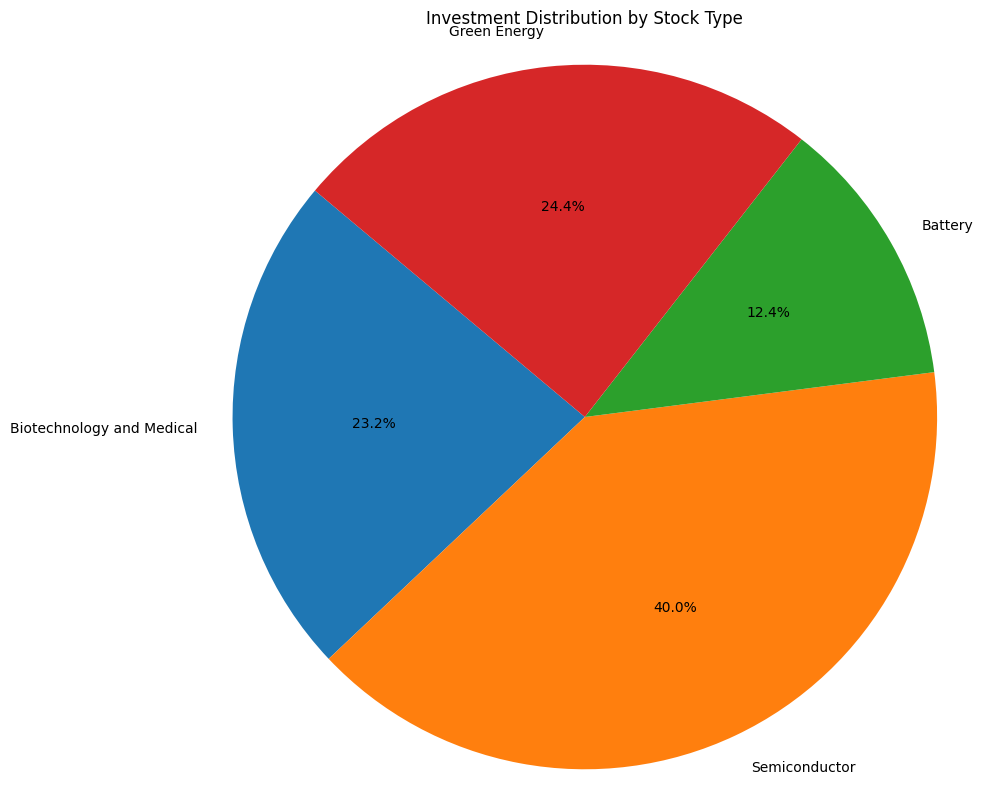

In [56]:
import matplotlib.pyplot as plt

# 計算各股票種類的總投資金額
total_bio_investment = stocks_bio_investment.sum()
total_semi_investment = stocks_semi_investment.sum()
total_battery_investment = stocks_battery_investment.sum()
total_energy_investment = stocks_energy_investment.sum()

# 計算各股票種類的比例
bio_percentage = total_bio_investment / total_initial_investment * 100
semi_percentage = total_semi_investment / total_initial_investment * 100
battery_percentage = total_battery_investment / total_initial_investment * 100
energy_percentage = total_energy_investment / total_initial_investment * 100

# 生成圓餅圖
labels = ['Biotechnology and Medical', 'Semiconductor', 'Battery', 'Green Energy']
sizes = [bio_percentage, semi_percentage, battery_percentage, energy_percentage]

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Investment Distribution by Stock Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [57]:
! pip install statsmodels


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
import statsmodels.api as sm

# 定義市場指數（貴買指數）
market_ticker = '^TWOII'
market_data = yf.download(market_ticker, start=start, end=end)['Adj Close']

# 計算市場日回報率
market_returns = market_data.pct_change().dropna()

# 計算投資組合的日回報率
portfolio_daily_returns = (returns[stocks] * max_sharpe_stock['Weights']).sum(axis=1)

# 確保投資組合回報率和市場回報率的日期對齊
portfolio_daily_returns = portfolio_daily_returns.loc[market_returns.index]

# 計算日超額回報率
daily_rf = (1 + Rf)**(1/252) - 1
excess_portfolio_returns = portfolio_daily_returns - daily_rf
excess_market_returns = market_returns - daily_rf

# 增加常數項
excess_market_returns_with_const = sm.add_constant(excess_market_returns)

# 進行CAPM回歸分析
capm_model = sm.OLS(excess_portfolio_returns, excess_market_returns_with_const)
capm_results = capm_model.fit()

# 顯示回歸結果
print(capm_results.summary())

# 提取Beta值
beta = capm_results.params[1]
print(f'Beta值: {beta}')


[*********************100%***********************]  1 of 1 completed


KeyError: "[Timestamp('2020-03-25 00:00:00'), Timestamp('2020-03-26 00:00:00'), Timestamp('2020-03-27 00:00:00'), Timestamp('2020-03-30 00:00:00'), Timestamp('2020-03-31 00:00:00'), Timestamp('2020-04-01 00:00:00'), Timestamp('2020-04-06 00:00:00'), Timestamp('2020-04-07 00:00:00'), Timestamp('2020-04-08 00:00:00'), Timestamp('2020-04-09 00:00:00'), Timestamp('2020-04-10 00:00:00'), Timestamp('2020-04-13 00:00:00'), Timestamp('2020-04-14 00:00:00'), Timestamp('2020-04-15 00:00:00'), Timestamp('2020-04-16 00:00:00'), Timestamp('2020-04-17 00:00:00'), Timestamp('2020-04-20 00:00:00'), Timestamp('2020-04-21 00:00:00'), Timestamp('2020-04-22 00:00:00'), Timestamp('2020-04-23 00:00:00'), Timestamp('2020-04-24 00:00:00'), Timestamp('2020-04-27 00:00:00'), Timestamp('2020-04-28 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-04-30 00:00:00'), Timestamp('2020-05-04 00:00:00'), Timestamp('2020-05-05 00:00:00'), Timestamp('2020-05-06 00:00:00'), Timestamp('2020-05-07 00:00:00'), Timestamp('2020-05-08 00:00:00'), Timestamp('2020-05-11 00:00:00'), Timestamp('2020-05-12 00:00:00'), Timestamp('2020-05-13 00:00:00'), Timestamp('2020-05-14 00:00:00'), Timestamp('2020-05-15 00:00:00'), Timestamp('2020-05-18 00:00:00'), Timestamp('2020-05-19 00:00:00'), Timestamp('2020-05-20 00:00:00'), Timestamp('2020-05-21 00:00:00'), Timestamp('2020-05-22 00:00:00'), Timestamp('2020-05-25 00:00:00'), Timestamp('2020-05-26 00:00:00'), Timestamp('2020-05-27 00:00:00'), Timestamp('2020-05-28 00:00:00'), Timestamp('2020-05-29 00:00:00'), Timestamp('2020-06-01 00:00:00'), Timestamp('2020-06-02 00:00:00'), Timestamp('2020-06-03 00:00:00'), Timestamp('2020-06-04 00:00:00'), Timestamp('2020-06-05 00:00:00'), Timestamp('2020-06-08 00:00:00'), Timestamp('2020-06-09 00:00:00'), Timestamp('2020-06-10 00:00:00'), Timestamp('2020-06-11 00:00:00'), Timestamp('2020-06-12 00:00:00'), Timestamp('2020-06-15 00:00:00'), Timestamp('2020-06-16 00:00:00'), Timestamp('2020-06-17 00:00:00'), Timestamp('2020-06-18 00:00:00'), Timestamp('2020-06-19 00:00:00'), Timestamp('2020-06-22 00:00:00'), Timestamp('2020-06-23 00:00:00'), Timestamp('2020-06-24 00:00:00'), Timestamp('2020-06-29 00:00:00'), Timestamp('2020-06-30 00:00:00'), Timestamp('2020-07-01 00:00:00'), Timestamp('2020-07-02 00:00:00'), Timestamp('2020-07-03 00:00:00'), Timestamp('2020-07-06 00:00:00'), Timestamp('2020-07-07 00:00:00'), Timestamp('2020-07-08 00:00:00'), Timestamp('2020-07-09 00:00:00'), Timestamp('2020-07-10 00:00:00'), Timestamp('2020-07-13 00:00:00'), Timestamp('2020-07-14 00:00:00'), Timestamp('2020-07-15 00:00:00'), Timestamp('2020-07-16 00:00:00'), Timestamp('2020-07-17 00:00:00'), Timestamp('2020-07-20 00:00:00'), Timestamp('2020-07-21 00:00:00'), Timestamp('2020-07-22 00:00:00'), Timestamp('2020-07-23 00:00:00'), Timestamp('2020-07-24 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-07-29 00:00:00'), Timestamp('2020-07-30 00:00:00'), Timestamp('2020-07-31 00:00:00'), Timestamp('2020-08-03 00:00:00'), Timestamp('2020-08-04 00:00:00'), Timestamp('2020-08-05 00:00:00'), Timestamp('2020-08-06 00:00:00'), Timestamp('2020-08-07 00:00:00'), Timestamp('2020-08-10 00:00:00'), Timestamp('2020-08-11 00:00:00'), Timestamp('2020-08-12 00:00:00'), Timestamp('2020-08-13 00:00:00'), Timestamp('2020-08-14 00:00:00'), Timestamp('2020-08-17 00:00:00'), Timestamp('2020-08-18 00:00:00'), Timestamp('2020-08-19 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-08-25 00:00:00'), Timestamp('2020-08-26 00:00:00'), Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-28 00:00:00'), Timestamp('2020-08-31 00:00:00'), Timestamp('2020-09-01 00:00:00'), Timestamp('2020-09-02 00:00:00'), Timestamp('2020-09-03 00:00:00'), Timestamp('2020-09-04 00:00:00'), Timestamp('2020-09-07 00:00:00'), Timestamp('2020-09-08 00:00:00'), Timestamp('2020-09-09 00:00:00'), Timestamp('2020-09-10 00:00:00'), Timestamp('2020-09-11 00:00:00'), Timestamp('2020-09-14 00:00:00'), Timestamp('2020-09-15 00:00:00'), Timestamp('2020-09-16 00:00:00'), Timestamp('2020-09-17 00:00:00'), Timestamp('2020-09-18 00:00:00'), Timestamp('2020-09-21 00:00:00'), Timestamp('2020-09-22 00:00:00'), Timestamp('2020-09-23 00:00:00'), Timestamp('2020-09-24 00:00:00'), Timestamp('2020-09-25 00:00:00'), Timestamp('2020-09-28 00:00:00'), Timestamp('2020-09-29 00:00:00'), Timestamp('2020-09-30 00:00:00'), Timestamp('2020-10-05 00:00:00'), Timestamp('2020-10-06 00:00:00'), Timestamp('2020-10-07 00:00:00'), Timestamp('2020-10-08 00:00:00'), Timestamp('2020-10-12 00:00:00'), Timestamp('2020-10-13 00:00:00'), Timestamp('2020-10-14 00:00:00'), Timestamp('2020-10-15 00:00:00'), Timestamp('2020-10-16 00:00:00'), Timestamp('2020-10-19 00:00:00'), Timestamp('2020-10-20 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2020-10-22 00:00:00'), Timestamp('2020-10-23 00:00:00'), Timestamp('2020-10-26 00:00:00'), Timestamp('2020-10-27 00:00:00'), Timestamp('2020-10-28 00:00:00'), Timestamp('2020-10-29 00:00:00'), Timestamp('2020-10-30 00:00:00'), Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-03 00:00:00'), Timestamp('2020-11-04 00:00:00'), Timestamp('2020-11-05 00:00:00'), Timestamp('2020-11-06 00:00:00'), Timestamp('2020-11-09 00:00:00'), Timestamp('2020-11-10 00:00:00'), Timestamp('2020-11-11 00:00:00'), Timestamp('2020-11-12 00:00:00'), Timestamp('2020-11-13 00:00:00'), Timestamp('2020-11-16 00:00:00'), Timestamp('2020-11-17 00:00:00'), Timestamp('2020-11-18 00:00:00'), Timestamp('2020-11-19 00:00:00'), Timestamp('2020-11-20 00:00:00'), Timestamp('2020-11-23 00:00:00'), Timestamp('2020-11-24 00:00:00'), Timestamp('2020-11-25 00:00:00'), Timestamp('2020-11-26 00:00:00'), Timestamp('2020-11-27 00:00:00'), Timestamp('2020-11-30 00:00:00'), Timestamp('2020-12-01 00:00:00'), Timestamp('2020-12-02 00:00:00'), Timestamp('2020-12-03 00:00:00'), Timestamp('2020-12-04 00:00:00'), Timestamp('2020-12-07 00:00:00'), Timestamp('2020-12-08 00:00:00'), Timestamp('2020-12-09 00:00:00'), Timestamp('2020-12-10 00:00:00'), Timestamp('2020-12-11 00:00:00'), Timestamp('2020-12-14 00:00:00'), Timestamp('2020-12-15 00:00:00'), Timestamp('2020-12-16 00:00:00'), Timestamp('2020-12-17 00:00:00'), Timestamp('2020-12-18 00:00:00'), Timestamp('2020-12-21 00:00:00'), Timestamp('2020-12-22 00:00:00'), Timestamp('2020-12-23 00:00:00'), Timestamp('2020-12-24 00:00:00'), Timestamp('2020-12-28 00:00:00'), Timestamp('2020-12-29 00:00:00'), Timestamp('2020-12-30 00:00:00'), Timestamp('2020-12-31 00:00:00'), Timestamp('2021-01-04 00:00:00'), Timestamp('2021-01-05 00:00:00'), Timestamp('2021-01-06 00:00:00'), Timestamp('2021-01-07 00:00:00'), Timestamp('2021-01-08 00:00:00'), Timestamp('2021-01-11 00:00:00'), Timestamp('2021-01-12 00:00:00'), Timestamp('2021-01-13 00:00:00'), Timestamp('2021-01-14 00:00:00'), Timestamp('2021-01-15 00:00:00'), Timestamp('2021-01-18 00:00:00'), Timestamp('2021-01-19 00:00:00'), Timestamp('2021-01-20 00:00:00'), Timestamp('2021-01-21 00:00:00'), Timestamp('2021-01-22 00:00:00'), Timestamp('2021-01-25 00:00:00'), Timestamp('2021-01-26 00:00:00'), Timestamp('2021-01-27 00:00:00'), Timestamp('2021-01-28 00:00:00'), Timestamp('2021-01-29 00:00:00'), Timestamp('2021-02-01 00:00:00'), Timestamp('2021-02-02 00:00:00'), Timestamp('2021-02-03 00:00:00'), Timestamp('2021-02-04 00:00:00'), Timestamp('2021-02-05 00:00:00'), Timestamp('2021-02-17 00:00:00'), Timestamp('2021-02-18 00:00:00'), Timestamp('2021-02-19 00:00:00'), Timestamp('2021-02-22 00:00:00'), Timestamp('2021-02-23 00:00:00'), Timestamp('2021-02-24 00:00:00'), Timestamp('2021-02-25 00:00:00'), Timestamp('2021-02-26 00:00:00'), Timestamp('2021-03-02 00:00:00'), Timestamp('2021-03-03 00:00:00'), Timestamp('2021-03-04 00:00:00'), Timestamp('2021-03-05 00:00:00'), Timestamp('2021-03-08 00:00:00'), Timestamp('2021-03-09 00:00:00'), Timestamp('2021-03-10 00:00:00'), Timestamp('2021-03-11 00:00:00'), Timestamp('2021-03-12 00:00:00'), Timestamp('2021-03-15 00:00:00'), Timestamp('2021-03-16 00:00:00'), Timestamp('2021-03-17 00:00:00'), Timestamp('2021-03-18 00:00:00'), Timestamp('2021-03-19 00:00:00'), Timestamp('2021-03-22 00:00:00'), Timestamp('2021-03-23 00:00:00')] not in index"

In [59]:
# 获取股票部分的回测数据
stocks_data = {ticker: yf.download(ticker, start=start, end=end) for ticker in stocks}

# 计算每个股票的回报率
returns = pd.DataFrame()
for ticker in stocks:
    data = yf.download(ticker, start=start, end=end)
    if not data.empty:
        data[ticker] = data['Adj Close'].pct_change()
        if returns.empty:
            returns = data[[ticker]]
        else:
            returns = returns.join(data[[ticker]], how='outer')

# 移除 NaN 值
returns = returns.dropna()

# 计算 TWII 和 TWOII 的数据
TWII = yf.download('^TWII', start=start, end=end)
TWOII = yf.download('^TWOII', start=start, end=end)

# 计算 TWII 和 TWOII 的回报率
TWII_return = TWII['Close'].pct_change()
HPR_TWII = (1 + TWII_return).cumprod() - 1
HPR_TWII.iloc[0] = 0

TWOII_return = TWOII['Close'].pct_change()
HPR_TWOII = (1 + TWOII_return).cumprod() - 1
HPR_TWOII.iloc[0] = 0

# 提取仅包含股票部分的 returns
returns_stocks_only = returns[stocks]

# 確保所有股票在相同日期範圍內有數據，並處理缺失值
returns_stocks_only = returns_stocks_only.dropna()

# 提取股票部分的權重
portfolio_weights_stocks = np.array(max_sharpe['Weights'][:len(stocks)])

# 計算投資組合的持有期回報率
HPR = (1 + (returns_stocks_only * portfolio_weights_stocks).sum(axis=1)).cumprod() - 1



[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

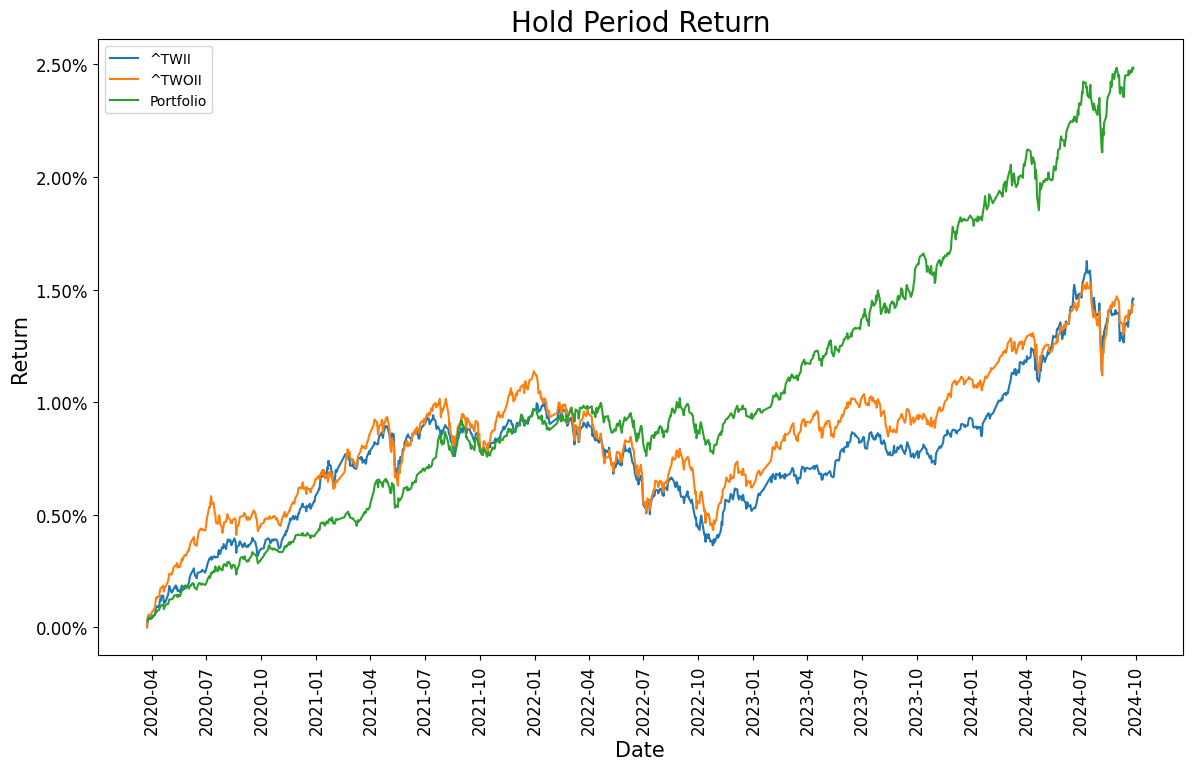

In [60]:
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
# 繪製持有期回報率
plt.figure(figsize=(14, 8))
plt.plot(HPR_TWII, label='^TWII')
plt.plot(HPR_TWOII, label='^TWOII')
plt.plot(HPR, label='Portfolio')
plt.title('Hold Period Return', fontsize=20)
plt.legend()

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

plt.xlabel('Date', fontsize=15)
plt.ylabel('Return', fontsize=15)
plt.xticks(rotation=90, fontsize=12)  # 將日期標籤旋轉90度
plt.yticks(fontsize=12)
plt.show()

In [61]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 計算投資組合回報率（假設HPR_with_strategy已經計算好）
portfolio_return = HPR.pct_change().dropna()
portfolio_cum_return = (1 + portfolio_return).cumprod() - 1

# 確保所有回報率的日期範圍對齊
common_dates = portfolio_return.index.intersection(TWOII_return.index)
portfolio_return = portfolio_return.loc[common_dates]
TWOII_return = TWOII_return.loc[common_dates]

# 計算年化回報率和標準差
def annualized_return(return_series):
    return ((1 + return_series.mean())**252) - 1

def annualized_std(return_series):
    return return_series.std() * np.sqrt(252)

# 計算最大回撤
def max_drawdown(return_series):
    cum_return = (1 + return_series).cumprod()
    peak = cum_return.cummax()
    drawdown = (cum_return - peak) / peak
    return drawdown.min()

# 計算Sharpe Ratio
def sharpe_ratio(return_series, rf_rate=0.04446):
    return (annualized_return(return_series) - rf_rate) / annualized_std(return_series)

# 計算Treynor Ratio
def treynor_ratio(return_series, beta, rf_rate=0.04446):
    return (annualized_return(return_series) - rf_rate) / beta

# 計算Jensen's Alpha
def jensen_alpha(portfolio_return, market_return, rf_rate=0.04446):
    excess_portfolio_return = portfolio_return - rf_rate / 252
    excess_market_return = market_return - rf_rate / 252
    beta, alpha, _, _, _ = linregress(excess_market_return, excess_portfolio_return)
    return alpha

# 計算Beta
def calculate_beta(portfolio_return, market_return):
    excess_portfolio_return = portfolio_return - rf_rate / 252
    excess_market_return = market_return - rf_rate / 252
    beta, _, _, _, _ = linregress(excess_market_return, excess_portfolio_return)
    return beta

# 計算信息比率
def information_ratio(portfolio_return, benchmark_return):
    diff_return = portfolio_return - benchmark_return
    return diff_return.mean() / diff_return.std() * np.sqrt(252)

# 計算勝率
def win_rate(return_series):
    return np.sum(return_series > 0) / len(return_series)

# 計算卡爾瑪比率
def calmar_ratio(return_series):
    return annualized_return(return_series) / abs(max_drawdown(return_series))

# 計算索提諾比率
def sortino_ratio(return_series, rf_rate=0.04446):
    downside_return = return_series[return_series < rf_rate / 252]
    return (annualized_return(return_series) - rf_rate) / (downside_return.std() * np.sqrt(252))

# 無風險利率
rf_rate = 0.04446

# 投資組合指標計算
portfolio_annual_return = annualized_return(portfolio_return)
portfolio_annual_std = annualized_std(portfolio_return)
portfolio_sharpe = sharpe_ratio(portfolio_return, rf_rate)
portfolio_max_drawdown = max_drawdown(portfolio_return)
portfolio_beta = calculate_beta(portfolio_return, TWOII_return)
portfolio_treynor = treynor_ratio(portfolio_return, portfolio_beta, rf_rate)
portfolio_alpha = jensen_alpha(portfolio_return, TWOII_return, rf_rate)
portfolio_info_ratio = information_ratio(portfolio_return, TWOII_return)
portfolio_win_rate = win_rate(portfolio_return)
portfolio_calmar = calmar_ratio(portfolio_return)
portfolio_sortino = sortino_ratio(portfolio_return, rf_rate)

# 打印結果
print(f"期末報酬率: {portfolio_cum_return.iloc[-1]:.4f}")
print(f"年化報酬率: {portfolio_annual_return:.4f}")
print(f"年化標準差: {portfolio_annual_std:.4f}")
print(f"Sharpe Ratio: {portfolio_sharpe:.4f}")
print(f"最大回撤 (MDD): {portfolio_max_drawdown:.4f}")
print(f"Jensen's Alpha: {portfolio_alpha:.4f}")
print(f"Beta: {portfolio_beta:.4f}")
print(f"Treynor Ratio: {portfolio_treynor:.4f}")
print(f"信息比率 (Information Ratio): {portfolio_info_ratio:.4f}")
print(f"勝率: {portfolio_win_rate:.4f}")
print(f"卡爾瑪比率 (Calmar Ratio): {portfolio_calmar:.4f}")
print(f"索提諾比率 (Sortino Ratio): {portfolio_sortino:.4f}")


期末報酬率: 94.2114
年化報酬率: 2.1972
年化標準差: 0.5114
Sharpe Ratio: 4.2093
最大回撤 (MDD): -0.2422
Jensen's Alpha: 0.0035
Beta: 1.4384
Treynor Ratio: 1.4966
信息比率 (Information Ratio): 2.1635
勝率: 0.5783
卡爾瑪比率 (Calmar Ratio): 9.0733
索提諾比率 (Sortino Ratio): 7.7568


# [**以下有買賣策略**]




In [62]:
import ta

# 初始化投資組合
initial_cash = total_initial_investment
cash = initial_cash
portfolio = {ticker: 0 for ticker in stocks}
portfolio_value = []

# 初始購買
for ticker in stocks:
    initial_investment = stock_weights[stocks.index(ticker)] * initial_cash
    stock_price = yf.download(ticker, start=start, end=end)['Adj Close'].iloc[0]
    portfolio[ticker] = initial_investment / stock_price

# 回測
for date in returns.index:
    daily_portfolio_value = 0

    for ticker in stocks:
        # 計算移動平均線
        stock_data = yf.download(ticker, start=start, end=end)
        stock_data['20MA'] = ta.trend.sma_indicator(stock_data['Adj Close'], window=20)
        stock_data['60MA'] = ta.trend.sma_indicator(stock_data['Adj Close'], window=60)
        stock_data['120MA'] = ta.trend.sma_indicator(stock_data['Adj Close'], window=120)

        if date in stock_data.index:
            current_price = stock_data.loc[date, 'Adj Close']
            current_20MA = stock_data.loc[date, '20MA']
            current_60MA = stock_data.loc[date, '60MA']
            current_120MA = stock_data.loc[date, '120MA']

            initial_investment = stock_weights[stocks.index(ticker)] * initial_cash

            # 賣出策略
            if current_20MA < current_60MA:
                cash += portfolio[ticker] * 0.2 * current_price
                portfolio[ticker] *= 0.8

            if current_20MA < current_120MA:
                cash += portfolio[ticker] * 0.2 * current_price
                portfolio[ticker] *= 0.8

            # 買入策略
            if current_20MA > current_60MA:
                if cash >= (initial_investment / current_price) * 0.2 * current_price:
                    portfolio[ticker] += (initial_investment / current_price) * 0.2
                    cash -= (initial_investment / current_price) * 0.2 * current_price

            if current_20MA > current_120MA:
                if cash >= (initial_investment / current_price) * 0.2 * current_price:
                    portfolio[ticker] += (initial_investment / current_price) * 0.2
                    cash -= (initial_investment / current_price) * 0.2 * current_price

            daily_portfolio_value += portfolio[ticker] * current_price

    # 記錄投資組合價值
    portfolio_value.append(daily_portfolio_value + cash)

# 繪製投資組合的持有期回報率
HPR_with_strategy = (pd.Series(portfolio_value, index=returns.index).pct_change() + 1).cumprod() - 1




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

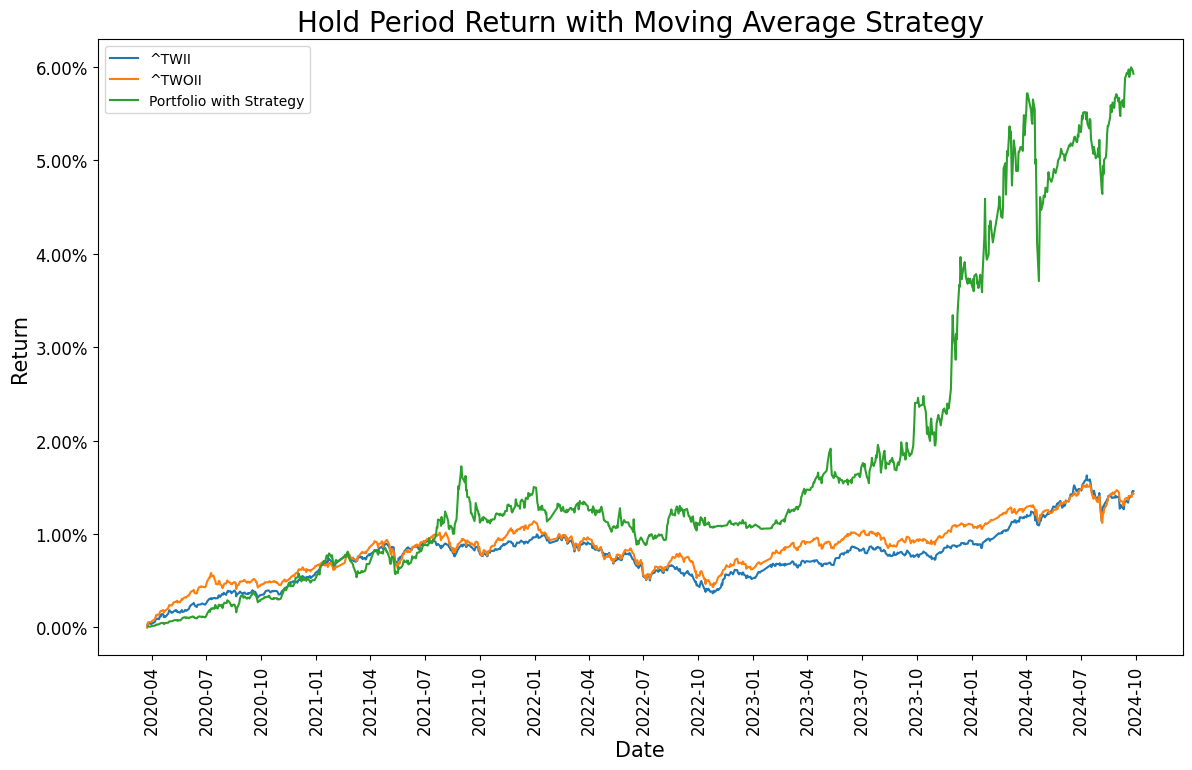

In [63]:
plt.figure(figsize=(14, 8))
plt.plot(HPR_TWII, label='^TWII')
plt.plot(HPR_TWOII, label='^TWOII')
plt.plot(HPR_with_strategy, label='Portfolio with Strategy')
plt.title('Hold Period Return with Moving Average Strategy', fontsize=20)
plt.legend()

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

plt.xlabel('Date', fontsize=15)
plt.ylabel('Return', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [64]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress



# 計算投資組合回報率（假設HPR_with_strategy已經計算好）
portfolio_return = HPR_with_strategy.pct_change().dropna()
portfolio_cum_return = (1 + portfolio_return).cumprod() - 1

# 計算年化回報率和標準差
def annualized_return(return_series):
    return ((1 + return_series.mean())**252) - 1

def annualized_std(return_series):
    return return_series.std() * np.sqrt(252)

# 計算最大回撤
def max_drawdown(return_series):
    cum_return = (1 + return_series).cumprod()
    peak = cum_return.cummax()
    drawdown = (cum_return - peak) / peak
    return drawdown.min()

# 計算Sharpe Ratio
def sharpe_ratio(return_series, rf_rate=0.04446):
    return (annualized_return(return_series) - rf_rate) / annualized_std(return_series)

# 計算Treynor Ratio
def treynor_ratio(return_series, beta, rf_rate=0.04446):
    return (annualized_return(return_series) - rf_rate) / beta

# 計算Jensen's Alpha
def jensen_alpha(portfolio_return, market_return, rf_rate=0.04446):
    excess_portfolio_return = portfolio_return - rf_rate
    excess_market_return = market_return - rf_rate
    beta, alpha, _, _, _ = linregress(excess_market_return, excess_portfolio_return)
    return alpha

# 計算Beta
def calculate_beta(portfolio_return, market_return):
    excess_portfolio_return = portfolio_return - rf_rate
    excess_market_return = market_return - rf_rate
    beta, _, _, _, _ = linregress(excess_market_return, excess_portfolio_return)
    return beta

# 計算信息比率
def information_ratio(portfolio_return, benchmark_return):
    diff_return = portfolio_return - benchmark_return
    return diff_return.mean() / diff_return.std() * np.sqrt(252)

# 計算勝率
def win_rate(return_series):
    return np.sum(return_series > 0) / len(return_series)

# 計算卡爾瑪比率
def calmar_ratio(return_series):
    return annualized_return(return_series) / abs(max_drawdown(return_series))

# 計算索提諾比率
def sortino_ratio(return_series, rf_rate=0.04446):
    downside_return = return_series[return_series < rf_rate]
    return (annualized_return(return_series) - rf_rate) / (downside_return.std() * np.sqrt(252))

# 無風險利率
rf_rate = 0.04446

# 投資組合指標計算
portfolio_annual_return = annualized_return(portfolio_return)
portfolio_annual_std = annualized_std(portfolio_return)
portfolio_sharpe = sharpe_ratio(portfolio_return, rf_rate)
portfolio_max_drawdown = max_drawdown(portfolio_return)
portfolio_beta = calculate_beta(portfolio_return, TWOII_return)
portfolio_treynor = treynor_ratio(portfolio_return, portfolio_beta, rf_rate)
portfolio_alpha = jensen_alpha(portfolio_return, TWOII_return, rf_rate)
portfolio_info_ratio = information_ratio(portfolio_return, TWOII_return)
portfolio_win_rate = win_rate(portfolio_return)
portfolio_calmar = calmar_ratio(portfolio_return)
portfolio_sortino = sortino_ratio(portfolio_return, rf_rate)

# 打印結果
print(f"期末報酬率: {portfolio_cum_return.iloc[-1]:.4f}")
print(f"年化報酬率: {portfolio_annual_return:.4f}")
print(f"年化標準差: {portfolio_annual_std:.4f}")
print(f"Sharpe Ratio: {portfolio_sharpe:.4f}")
print(f"最大回撤 (MDD): {portfolio_max_drawdown:.4f}")
print(f"Jensen's Alpha: {portfolio_alpha:.4f}")
print(f"Beta: {portfolio_beta:.4f}")
print(f"Treynor Ratio: {portfolio_treynor:.4f}")
print(f"信息比率 (Information Ratio): {portfolio_info_ratio:.4f}")
print(f"勝率: {portfolio_win_rate:.4f}")
print(f"卡爾瑪比率 (Calmar Ratio): {portfolio_calmar:.4f}")
print(f"索提諾比率 (Sortino Ratio): {portfolio_sortino:.4f}")


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1098 and the array at index 1 has size 1099

In [ ]:
import statsmodels.api as sm

# 計算投資組合的持有期回報率
HPR_with_strategy = (pd.Series(portfolio_value, index=returns.index).pct_change() + 1).cumprod() - 1

# 計算投資組合的日回報率
portfolio_daily_returns_with_strategy = pd.Series(portfolio_value, index=returns.index).pct_change().dropna()

# 確保投資組合回報率和市場回報率的日期對齊
aligned_returns = portfolio_daily_returns_with_strategy.align(market_returns, join='inner')
portfolio_daily_returns_with_strategy = aligned_returns[0]
market_returns = aligned_returns[1]

# 計算日超額回報率
daily_rf = (1 + Rf)**(1/252) - 1
excess_portfolio_returns_with_strategy = portfolio_daily_returns_with_strategy - daily_rf
excess_market_returns = market_returns - daily_rf

# 增加常數項
excess_market_returns_with_const = sm.add_constant(excess_market_returns)

# 進行CAPM回歸分析
capm_model_with_strategy = sm.OLS(excess_portfolio_returns_with_strategy, excess_market_returns_with_const)
capm_results_with_strategy = capm_model_with_strategy.fit()

# 顯示回歸結果
print(capm_results_with_strategy.summary())

# 提取Beta值
beta_with_strategy = capm_results_with_strategy.params[1]
print(f'Beta值: {beta_with_strategy}')

# 計算年化回報率
annual_portfolio_returns_with_strategy = (portfolio_daily_returns_with_strategy + 1).prod()**(252/len(portfolio_daily_returns_with_strategy)) - 1
print(f'年化回報率: {annual_portfolio_returns_with_strategy}')


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     358.9
Date:                Sat, 29 Jun 2024   Prob (F-statistic):           8.27e-69
Time:                        11:26:18   Log-Likelihood:                 2660.0
No. Observations:                1022   AIC:                            -5316.
Df Residuals:                    1020   BIC:                            -5306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.001      2.043      0.0

## *蒙地卡羅預測未來*

In [ ]:
number_of_portfolios = 10000
Rf = 0.04446  # 無風險利率
portfolio_weights = []
portfolio_returns = []
portfolio_risks = []
sharpe_ratios = []
np.random.seed(1)  # 固定隨機亂數

# 確認股票變數數量
num_stocks = len(stocks)

for portfolio in range(number_of_portfolios):
    # 隨機生成股票的權重
    weights = np.random.random_sample(num_stocks)
    weights = weights / np.sum(weights)
    portfolio_weights.append(weights)

    # 計算年化回報率
    annualized_return = np.sum(returns[stocks].mean() * weights) * 252
    portfolio_returns.append(annualized_return)

    # 計算投資組合風險
    matrix_covariance = returns[stocks].cov() * 252
    portfolio_covariance = np.dot(np.dot(weights.T, matrix_covariance), weights)
    portfolio_std = np.sqrt(portfolio_covariance)
    portfolio_risks.append(portfolio_std)

    # Sharpe Ratio
    sharpe_ratio = (annualized_return - Rf) / portfolio_std
    sharpe_ratios.append(sharpe_ratio)

# Portfolio DataFrame
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)
sharpe_ratios = np.array(sharpe_ratios)
portfolio_weights = np.array(portfolio_weights)

portfolio_metrics = [portfolio_returns, portfolio_risks, sharpe_ratios, portfolio_weights]
portfolio_df = pd.DataFrame(portfolio_metrics).T
portfolio_df.columns = ['Return', 'Risk', 'Sharpe Ratio', 'Weights']


[*********************100%%**********************]  18 of 18 completed


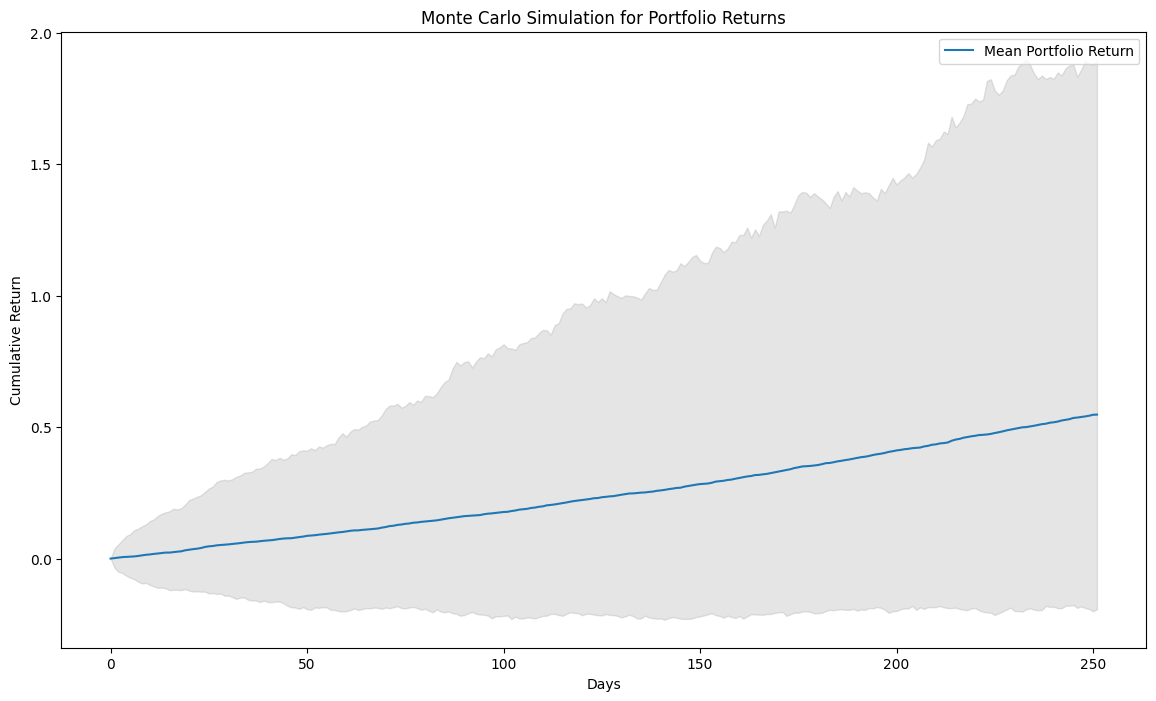

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

# 设置时间范围
start = dt.datetime(2020, 4, 1)
end = dt.datetime(2024, 6, 10)
future_days = 252  # 预测未来一年

# 定义股票、ETF 和债券代码
stocks_bio = ['1565.TWO', '4105.TWO', '4175.TWO', '6469.TWO', '6747.TWO']
stocks_semi = ['3105.TWO', '3264.TWO', '3680.TWO', '5274.TWO', '6488.TWO', '6568.TWO', '8086.TWO', '3324.TWO', '6187.TWO']
stocks_battery = ['8255.TWO']
stocks_energy = ['3713.TWO', '5432.TWO', '6692.TWO']
bonds = ['00679B.TWO', '00687B.TWO', '00758B.TWO', '00799B.TWO']
etfs = ['00877.TWO', '00888.TWO', '006201.TWO']
stocks = stocks_energy + stocks_semi + stocks_battery + stocks_bio
tickers = stocks + etfs + bonds

# 获取历史数据并计算收益率
data = yf.download(stocks, start=start, end=end)['Adj Close']
returns = data.pct_change().dropna()

# 设置模拟参数
num_simulations = 1000
num_days = future_days
results = np.zeros((num_simulations, num_days))

# 获取最大Sharpe比率组合的权重
max_sharpe_idx = portfolio_df['Sharpe Ratio'].astype(float).idxmax()
portfolio_weights = portfolio_df.iloc[max_sharpe_idx]['Weights']

# 开始蒙特卡罗模拟
for i in range(num_simulations):
    prices = data.iloc[-1, :]  # 使用最后一个已知价格
    sim_returns = np.zeros((num_days, len(stocks)))

    for t in range(num_days):
        # 使用均值和协方差矩阵生成未来收益率
        sim_returns[t, :] = np.random.multivariate_normal(returns.mean(), returns.cov())
        prices *= (1 + sim_returns[t, :])
        results[i, t] = np.dot(prices, portfolio_weights[:len(prices)])

    # 计算组合收益率
    results[i, :] = results[i, :] / results[i, 0] - 1

# 计算95%置信区间
mean_result = np.mean(results, axis=0)
upper_percentile = np.percentile(results, 97.5, axis=0)
lower_percentile = np.percentile(results, 2.5, axis=0)

# 绘制结果
plt.figure(figsize=(14, 8))
plt.plot(mean_result, label='Mean Portfolio Return')
plt.fill_between(range(num_days), lower_percentile, upper_percentile, color='gray', alpha=0.2)
plt.title('Monte Carlo Simulation for Portfolio Returns')
plt.xlabel('Days')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


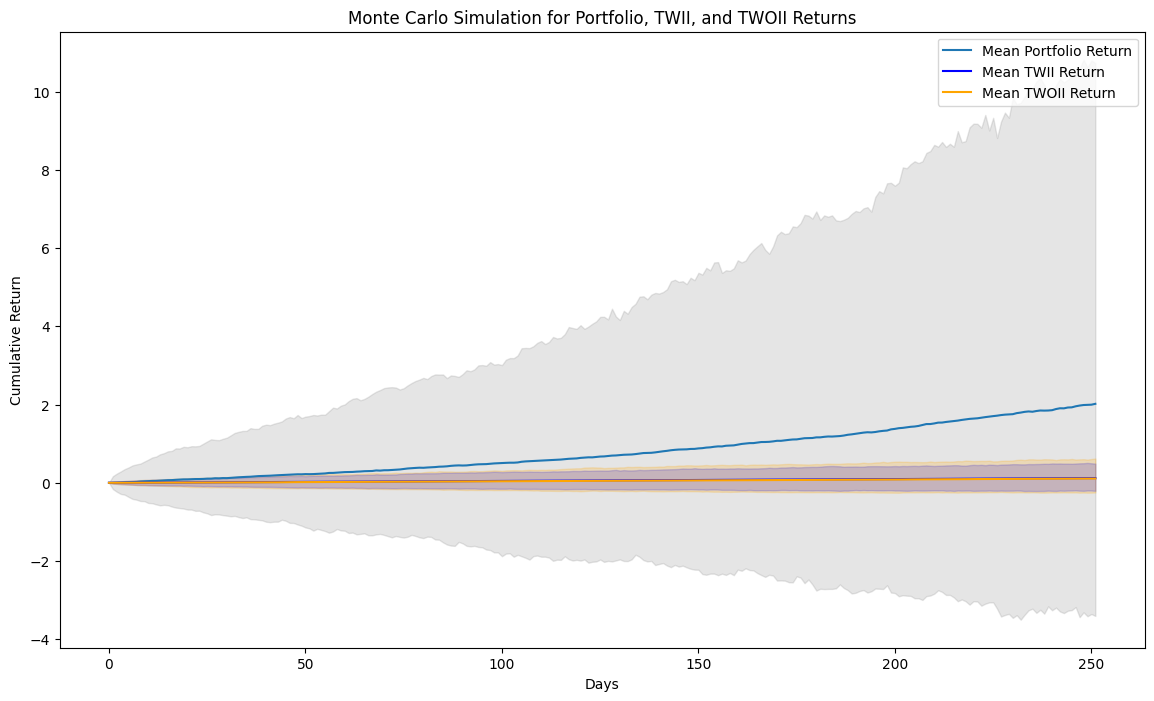

In [ ]:
# 进行模拟
num_simulations = 1000
portfolio_results = monte_carlo_simulation(returns, max_sharpe_weights, num_simulations, future_days)
TWII_results = single_asset_monte_carlo_simulation(TWII_returns, num_simulations, future_days)
TWOII_results = single_asset_monte_carlo_simulation(TWOII_returns, num_simulations, future_days)

# 计算95%置信区间
def calculate_statistics(results):
    mean_result = np.mean(results, axis=0)
    upper_percentile = np.percentile(results, 97.5, axis=0)
    lower_percentile = np.percentile(results, 2.5, axis=0)
    return mean_result, upper_percentile, lower_percentile

portfolio_mean, portfolio_upper, portfolio_lower = calculate_statistics(portfolio_results)
TWII_mean, TWII_upper, TWII_lower = calculate_statistics(TWII_results)
TWOII_mean, TWOII_upper, TWOII_lower = calculate_statistics(TWOII_results)

# 绘制结果
plt.figure(figsize=(14, 8))

plt.plot(portfolio_mean, label='Mean Portfolio Return')
plt.fill_between(range(future_days), portfolio_lower, portfolio_upper, color='gray', alpha=0.2)

plt.plot(TWII_mean, label='Mean TWII Return', color='blue')
plt.fill_between(range(future_days), TWII_lower, TWII_upper, color='blue', alpha=0.2)

plt.plot(TWOII_mean, label='Mean TWOII Return', color='orange')
plt.fill_between(range(future_days), TWOII_lower, TWOII_upper, color='orange', alpha=0.2)

plt.title('Monte Carlo Simulation for Portfolio, TWII, and TWOII Returns')
plt.xlabel('Days')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()
